In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from copy import deepcopy

# Data

In [6]:
def dataset1(period=200, N_tot=1000):
    mu = 0
    sigma = 1.
    N = 1
    
    T = [0, 1]
    X = [np.random.normal(mu, sigma, 1)[0], np.random.normal(mu, sigma, 1)[0]]
    
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            mu += 0.5 * N
        T += [i]
        ax = 0.6 * X[i-1] - 0.5 * X[i-2] + np.random.normal(mu, sigma, 1)[0]
        X += [ax]
    return np.array(X).reshape(-1, 1)

In [7]:
N_tot = 20000
X = dataset1(period=2000, N_tot=N_tot)
T = np.arange(len(X))

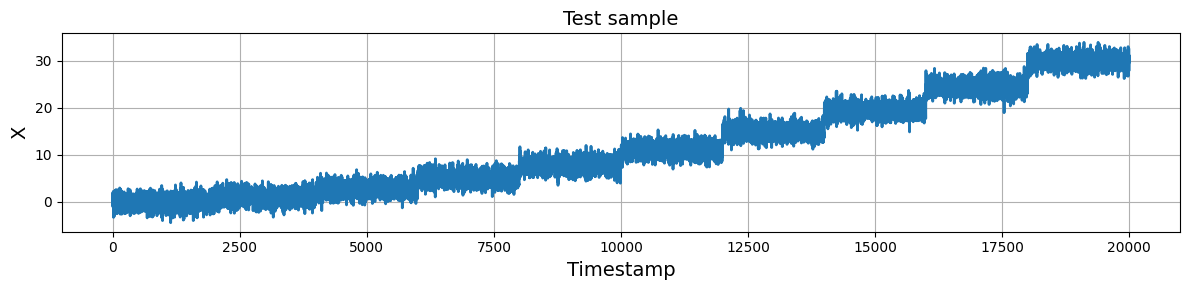

In [8]:
# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T, X[:, 0], linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.show()

# Change point detection

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import algorithms

In [10]:
clf = QuadraticDiscriminantAnalysis()
cpd = algorithms.ChangePointDetectionClassifier(base_classifier=clf, metric="KL_sym", periods=10, 
                                                window_size=500, step=10, n_runs=1)

T_score, score = cpd.predict(X)

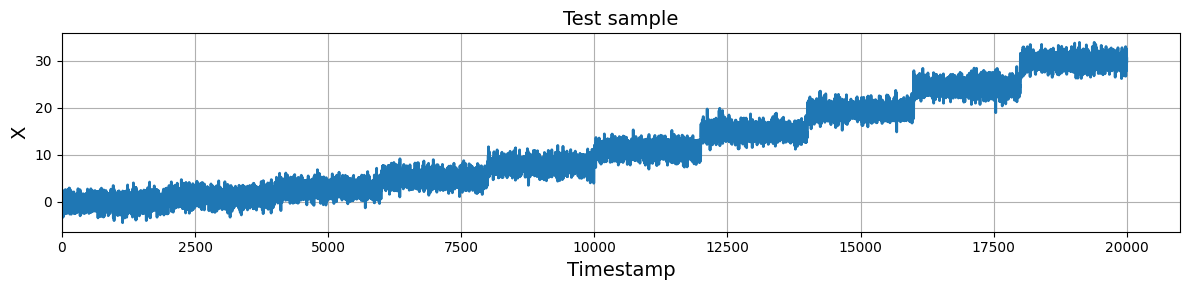

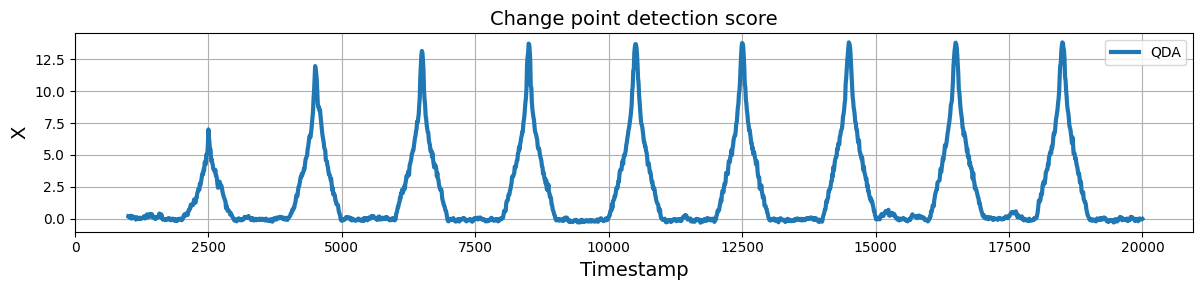

In [11]:
# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T, X, linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.xlim(0)
plt.show()


# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T_score, score, linewidth=3, label="QDA")

plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Change point detection score', size=14)
plt.legend(loc='best')
plt.tight_layout()
plt.xlim(0)
plt.show()